### Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import model_selection
from sklearn import metrics

In [84]:
df = pd.read_excel('input_model.xlsx')

In [85]:
df.head()

,log_limit_bal,log_age,sex,marriage,education,sep_status,aug_status,jul_status,jun_status,may_status,apr_status,default
0,9.903488,3.178054,2,1,2,2,2,0,0,0,0,1
1,11.695247,3.258097,2,2,2,0,2,0,0,0,2,1
2,11.407565,3.526361,2,2,2,0,0,0,0,0,0,0
3,10.819778,3.610918,2,1,2,0,0,0,0,0,0,0
4,10.819778,4.043051,1,1,2,0,0,0,0,0,0,0


#### Converting the catgorical variables to dummy varibales

In [86]:
df = pd.get_dummies(df,prefix=['sex','marriage','education','sep_status','aug_status','jul_status','jun_status','may_status','apr_status'],columns=['sex','marriage','education','sep_status','aug_status','jul_status','jun_status','may_status','apr_status'])

In [87]:
df.head()

,log_limit_bal,log_age,default,sex_1,sex_2,marriage_1,marriage_2,marriage_3,education_1,education_2,...,may_status_7,may_status_8,apr_status_0,apr_status_2,apr_status_3,apr_status_4,apr_status_5,apr_status_6,apr_status_7,apr_status_8
0,9.903488,3.178054,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,11.695247,3.258097,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,11.407565,3.526361,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,10.819778,3.610918,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,10.819778,4.043051,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [88]:
x = df.drop('default',axis=1)

In [89]:
y = df[['default']]
y.head()

,default
0,1
1,1
2,0
3,0
4,0


#### Modeling

#### Splitting the dataset into training and test data set

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Using Gridsearchcv to fin the correct hyperameter to our model

In [91]:

param_grid = {
         'learning_rate':[0.1,0.5,1],
          'max_depth':[4],
          'gamma':[0.25],
          'reg_lambda':[10.0,20,100],
          'scale_pos_weight':[3]
          }
optimal_params = model_selection.GridSearchCV(
                 estimator=xgb.XGBClassifier(objective='binary:logistic',
                                             seed=42,
                                             subsample=0.9,
                                             colsample_bytree=0.5),
                 param_grid=param_grid,
                 scoring='roc_auc',
                 verbose=0,
                 n_jobs=10,
                 cv=3
                )

#### Lets first try with whole dataset

In [92]:
optimal_params.fit(x_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(x_test,y_test)],
                   verbose=False
                    )
print(optimal_params.best_params_)

D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 20, 'scale_pos_weight': 3}


In [93]:
clf_xbg = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=4,
                            reg_lambda=20,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5                            
                           )

In [94]:
clf_xbg.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(x_test,y_test)])

[17:00:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.43048
[1]	validation_0-aucpr:0.50752
[2]	validation_0-aucpr:0.51428
[3]	validation_0-aucpr:0.52463
[4]	validation_0-aucpr:0.52063
[5]	validation_0-aucpr:0.52383
[6]	validation_0-aucpr:0.52556
[7]	validation_0-aucpr:0.52700
[8]	validation_0-aucpr:0.52840
[9]	validation_0-aucpr:0.53111
[10]	validation_0-aucpr:0.53393
[11]	validation_0-aucpr:0.53495
[12]	validation_0-aucpr:0.53417
[13]	validation_0-aucpr:0.53439
[14]	validation_0-aucpr:0.53329
[15]	validation_0-aucpr:0.53297
[16]	validation_0-aucpr:0.53302
[17]	validation_0-aucpr:0.53363
[18]	validation

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, ...)

In [95]:
preds = clf_xbg.predict(x_test)

#### With the ensemble models,we can find the feature importance.Lets plot them and see

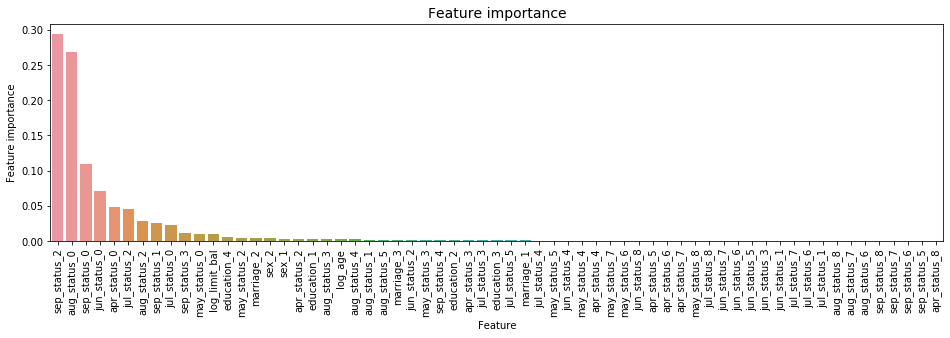

In [96]:
tmp = pd.DataFrame({'Feature':x.columns,'Feature importance':clf_xbg.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize=(16,4))
plt.title('Feature importance',fontsize=14)
s= sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [97]:
from sklearn import metrics

In [98]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4672
           1       0.53      0.54      0.53      1328

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000



In [99]:
metrics.confusion_matrix(y_test,preds)

array([[4022,  650],
       [ 606,  722]], dtype=int64)

In [100]:
metrics.recall_score(preds,y_test)

0.5262390670553936

In [101]:
metrics.roc_auc_score(preds,y_test)

0.6976484877195723

### This model has performed well compared to all of the Randomforest model that we implemented.Lets try to undersample and oversample the data and compare the models

#### Upsampling

In [102]:
x_train_rg,x_test_rg,y_train_rg,y_test_rg = train_test_split(x,y,test_size=0.2,random_state=42)


In [103]:
x_train_u,y_train_u = resample(x_train_rg[y_train_rg.default==1],y_train_rg[y_train_rg.default==1],replace=True,
                               n_samples=x_train_rg[y_train_rg.default==0].shape[0],random_state=1
                                )

In [104]:
x_train_u = pd.concat((pd.DataFrame(x_train_rg[y_train_rg.default==0]),x_train_u))
y_train_u = pd.concat((pd.DataFrame(y_train_rg[y_train_rg.default==0]),y_train_u))

In [105]:
param_grid = {
         'learning_rate':[0.1,0.5,1],
          'max_depth':[4],
          'gamma':[0.25],
          'reg_lambda':[10.0,20,100],
          'scale_pos_weight':[3]
          }
up_optimal_params = model_selection.GridSearchCV(
                 estimator=xgb.XGBClassifier(objective='binary:logistic',
                                             seed=42,
                                             subsample=0.9,
                                             colsample_bytree=0.5),
                 param_grid=param_grid,
                 scoring='roc_auc',
                 verbose=0,
                 n_jobs=10,
                 cv=3
                )

In [106]:
up_optimal_params.fit(x_train_u,
                   y_train_u,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(x_test,y_test)],
                   verbose=False
                    )
print(up_optimal_params.best_params_)

D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


{'gamma': 0.25, 'learning_rate': 0.5, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


In [107]:
up_clf_xbg = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.5,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5                            
                           )

In [108]:
up_clf_xbg.fit(x_train_u,
            y_train_u,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(x_test,y_test)])

[17:00:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.42901
[1]	validation_0-aucpr:0.49302
[2]	validation_0-aucpr:0.50320
[3]	validation_0-aucpr:0.50786
[4]	validation_0-aucpr:0.50687
[5]	validation_0-aucpr:0.51440
[6]	validation_0-aucpr:0.52223
[7]	validation_0-aucpr:0.52213
[8]	validation_0-aucpr:0.52333
[9]	validation_0-aucpr:0.52131
[10]	validation_0-aucpr:0.52178
[11]	validation_0-aucpr:0.52540
[12]	validation_0-aucpr:0.52824
[13]	validation_0-aucpr:0.52976
[14]	validation_0-aucpr:0.53387
[15]	validation_0-aucpr:0.53264
[16]	validation_0-aucpr:0.53339
[17]	validation_0-aucpr:0.53598
[18]	validation

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=0.5,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, ...)

In [109]:
up_preds = up_clf_xbg.predict(x_test)

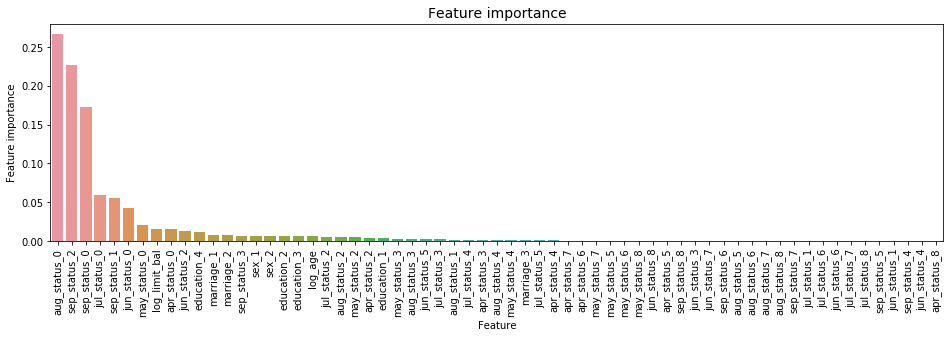

In [110]:
tmp = pd.DataFrame({'Feature':x.columns,'Feature importance':up_clf_xbg.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize=(16,4))
plt.title('Feature importance',fontsize=14)
s= sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [111]:
metrics.recall_score(up_preds,y_test)

0.23729446935724963

In [112]:
metrics.confusion_matrix(up_preds,y_test)

array([[ 590,   58],
       [4082, 1270]], dtype=int64)

In [113]:
print(metrics.classification_report(up_preds,y_test))

              precision    recall  f1-score   support

           0       0.13      0.91      0.22       648
           1       0.96      0.24      0.38      5352

    accuracy                           0.31      6000
   macro avg       0.54      0.57      0.30      6000
weighted avg       0.87      0.31      0.36      6000



In [114]:
metrics.roc_auc_score(up_preds,y_test)

0.5738941482588718

## Downsampled

In [115]:
x_train_d,y_train_d = resample(x_train_rg[y_train_rg.default==0],y_train_rg[y_train_rg.default==0],replace=True,
                               n_samples=x_train_rg[y_train_rg.default==1].shape[0],random_state=1
                                                    )

In [116]:
x_train_d = pd.concat((pd.DataFrame(x_train_rg[y_train_rg.default==1]),x_train_u))
y_train_d = pd.concat((pd.DataFrame(y_train_rg[y_train_rg.default==1]),y_train_u))

In [117]:
x_train_d.shape

(42688, 63)

In [118]:
param_grid = {
         'learning_rate':[0.1,0.5,1],
          'max_depth':[4],
          'gamma':[0.25],
          'reg_lambda':[10.0,20,100],
          'scale_pos_weight':[3]
          }
down_optimal_params = model_selection.GridSearchCV(
                 estimator=xgb.XGBClassifier(objective='binary:logistic',
                                             seed=42,
                                             subsample=0.9,
                                             colsample_bytree=0.5),
                 param_grid=param_grid,
                 scoring='roc_auc',
                 verbose=0,
                 n_jobs=10,
                 cv=3
                )

In [119]:
down_optimal_params.fit(x_train_d,
                   y_train_d,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(x_test,y_test)],
                   verbose=False
                    )
print(down_optimal_params.best_params_)

D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
D:\Program Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


{'gamma': 0.25, 'learning_rate': 1, 'max_depth': 4, 'reg_lambda': 100, 'scale_pos_weight': 3}


In [120]:
down_clf_xbg = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=1,
                            max_depth=4,
                            reg_lambda=100,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5                            
                           )

In [121]:
down_clf_xbg.fit(x_train_d,
            y_train_d,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(x_test,y_test)])

[17:01:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.40851
[1]	validation_0-aucpr:0.45287
[2]	validation_0-aucpr:0.50188
[3]	validation_0-aucpr:0.49897
[4]	validation_0-aucpr:0.50922
[5]	validation_0-aucpr:0.51159
[6]	validation_0-aucpr:0.51642
[7]	validation_0-aucpr:0.52170
[8]	validation_0-aucpr:0.52399
[9]	validation_0-aucpr:0.52431
[10]	validation_0-aucpr:0.52412
[11]	validation_0-aucpr:0.53039
[12]	validation_0-aucpr:0.53081
[13]	validation_0-aucpr:0.53553
[14]	validation_0-aucpr:0.53522
[15]	validation_0-aucpr:0.53403
[16]	validation_0-aucpr:0.53314
[17]	validation_0-aucpr:0.53317
[18]	validation

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, ...)

In [122]:
down_preds = down_clf_xbg.predict(x_test)

In [123]:
metrics.confusion_matrix(down_preds,y_test)

array([[ 177,   17],
       [4495, 1311]], dtype=int64)

In [124]:
metrics.recall_score(down_preds,y_test)

0.2258008956252153

In [125]:
metrics.roc_auc_score(down_preds,y_test)

0.569086014822917

####  This model has performed very poorly.Lets implement the whole data without over and undersampling as it is our best performing model